# We shall use the same dataset used in previous assignment -digits.Make a 80-20 train/test split.

(1797, 64)


<Figure size 432x288 with 0 Axes>

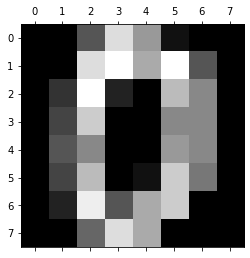

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [2]:
X = digits.data
y = digits.target

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2)

# Using scikit learn perform a LDA on the dataset. Find out the number of components in the projected subspace.

In [5]:
from sklearn.decomposition import LatentDirichletAllocation

In [13]:
lda = LatentDirichletAllocation(n_components=1,random_state=0)

In [14]:
lda.fit(X)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=1, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [16]:
lda.transform(X)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

 
lda = LinearDiscriminantAnalysis()

lda.fit(X,y)

x_new = lda.transform(X) 


In [22]:
x_new.shape

(1797, 9)

# Transform the dataset and fit a logistic regression and observe the accuracy. Compare it with the previous model based on PCA in terms of accuracy and model complexity.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_new,y , test_size = 0.2)

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [25]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
y_pred=model.predict(X_test)

In [27]:
#Accuracy Score
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9611111111111111

In [28]:
#accuracy nearly equal to pca